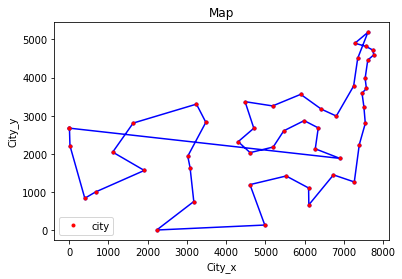

Best Path:
[45, 35, 4, 26, 42, 10, 24, 32, 39, 48, 5, 29, 2, 41, 34, 3, 22, 16, 1, 8, 38, 31, 44, 18, 7, 28, 6, 37, 19, 27, 43, 17, 30, 36, 46, 33, 20, 47, 21, 13, 25, 14, 23, 11, 12, 15, 40, 9]
Best distance:33457.0


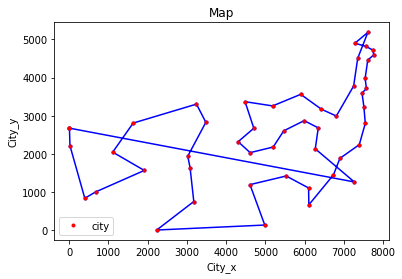

Best Path:
[45, 35, 4, 26, 42, 10, 24, 32, 39, 48, 5, 29, 2, 41, 34, 3, 22, 16, 1, 9, 38, 31, 44, 18, 7, 28, 6, 37, 19, 27, 43, 17, 30, 36, 46, 33, 20, 47, 21, 13, 25, 14, 23, 11, 12, 15, 40, 8]
Best distance:33728.0


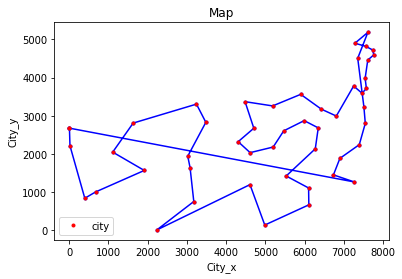

Best Path:
[45, 35, 4, 26, 42, 10, 24, 32, 39, 48, 5, 29, 2, 34, 41, 16, 22, 3, 40, 15, 12, 11, 23, 14, 25, 13, 21, 47, 20, 33, 46, 36, 18, 7, 28, 6, 37, 19, 27, 43, 17, 30, 44, 31, 38, 9, 1, 8]
Best distance:33661.0


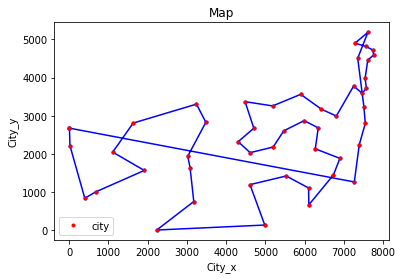

Best Path:
[45, 35, 4, 26, 42, 10, 24, 32, 39, 48, 5, 29, 2, 41, 34, 3, 22, 16, 1, 9, 40, 15, 12, 11, 23, 14, 25, 13, 21, 47, 20, 33, 46, 36, 18, 7, 28, 6, 37, 19, 27, 43, 17, 30, 44, 31, 38, 8]
Best distance:33932.0


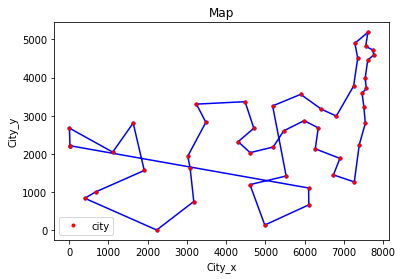

Best Path:
[35, 45, 10, 24, 42, 26, 4, 2, 29, 5, 48, 39, 32, 21, 13, 25, 14, 23, 11, 12, 15, 40, 9, 1, 8, 38, 31, 44, 18, 7, 28, 6, 37, 19, 27, 17, 43, 30, 36, 46, 33, 20, 47, 3, 34, 41, 16, 22]
Best distance:33661.0


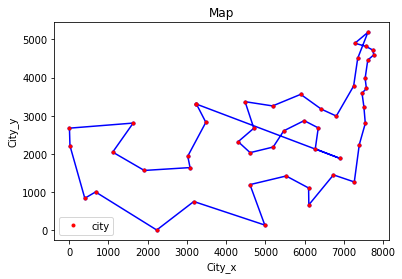

Best Path:
[32, 39, 48, 5, 42, 10, 24, 45, 35, 4, 26, 2, 29, 41, 34, 3, 22, 16, 1, 8, 38, 31, 44, 18, 7, 28, 6, 37, 19, 27, 43, 17, 30, 36, 46, 33, 20, 47, 21, 13, 25, 14, 23, 11, 12, 15, 40, 9]
Best distance:33314.0


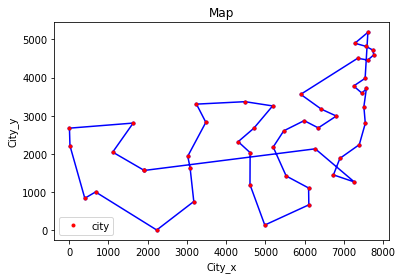

Best Path:
[42, 10, 24, 45, 35, 4, 26, 2, 29, 5, 48, 39, 32, 21, 47, 13, 25, 14, 34, 41, 16, 22, 3, 23, 11, 12, 15, 46, 33, 20, 30, 6, 37, 19, 27, 43, 17, 28, 36, 18, 7, 44, 31, 38, 9, 1, 8, 40]
Best distance:33916.0


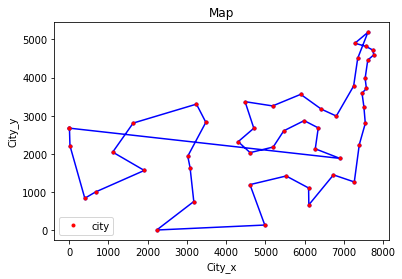

Best Path:
[45, 35, 4, 26, 42, 10, 24, 32, 39, 48, 5, 29, 2, 41, 34, 3, 22, 16, 1, 8, 38, 31, 44, 18, 7, 28, 6, 37, 19, 27, 43, 17, 30, 36, 46, 33, 20, 47, 21, 13, 25, 14, 23, 11, 12, 15, 40, 9]
Best distance:33457.0


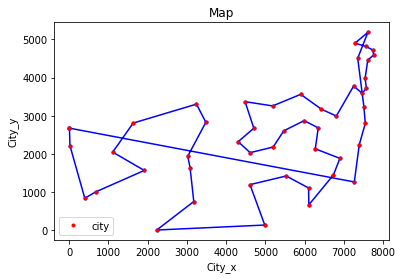

Best Path:
[45, 35, 4, 26, 42, 10, 24, 32, 39, 48, 5, 29, 2, 41, 34, 3, 22, 16, 1, 9, 40, 15, 12, 11, 23, 14, 25, 13, 21, 47, 20, 33, 46, 36, 18, 7, 28, 6, 37, 19, 27, 43, 17, 30, 44, 31, 38, 8]
Best distance:33932.0


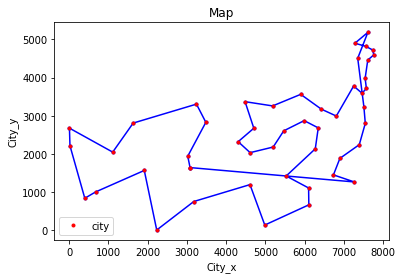

Best Path:
[5, 48, 39, 32, 24, 10, 45, 35, 4, 26, 42, 2, 29, 34, 41, 16, 22, 3, 40, 15, 12, 11, 23, 14, 25, 13, 21, 47, 20, 33, 46, 36, 18, 7, 28, 6, 37, 19, 27, 43, 17, 30, 44, 31, 38, 9, 1, 8]
Best distance:33533.0
33659.1


In [3]:
#求各自平均值(10 ,100)
import random
import copy
import time
import sys
from matplotlib import pyplot as plt

class Ant:
    def __init__(self,ID):
        self.ID = ID
        self.__clean_data()
#     
    #ant每次迭代前初始化
    def __clean_data(self):
        
        #蚂蚁随机生成起点、标记
        self.path = []
        self.total_distance = 0.0
        self.open_table_city = [True for i in range(city_num)]
        city_index = random.randint(0,city_num - 1)
        self.current_city = city_index
        self.path.append(city_index)
        self.open_table_city[city_index] = False
        self.move_count = 1

    def __choice_next_city(self):
        next_city = -1
        select_citys_prob = [0.0 for i in range(city_num)]
        total_prob = 0.0
        for i in range(city_num):
            if self.open_table_city[i]:
                #访问各个城市的概率
                select_citys_prob[i] = pow(pheromone_graph[self.current_city][i],ALPHA)*\
                pow((1.0/distance_graph[self.current_city][i]),BETA)
                total_prob += select_citys_prob[i]
                
        # 轮盘赌法选择
        if total_prob > 0.0:
            temp_prob = random.uniform(0.0,total_prob)
            for i in range(city_num):
                if self.open_table_city[i]:
                    temp_prob -= select_citys_prob[i]
                    if temp_prob < 0.0:#选中城市
                        next_city = i
                        break
        if next_city == -1:
            for i in range(city_num):
                if self.open_table_city[i]:
                    next_city = i
                    break

        return next_city
    #计算蚂蚁构建的路径长度
    def __cal_total_distance(self):
        temp_distance = 0.0
        for i in range(1,city_num):
            start,end = self.path[i],self.path[i - 1]
            temp_distance += distance_graph[start][end]

        end = 0
        temp_distance += distance_graph[start][end]
        self.total_distance = temp_distance
        
    def __move(self,next_city):
        self.path.append(next_city)
        self.open_table_city[next_city] = False
        self.total_distance += distance_graph[self.current_city][next_city]
        self.current_city = next_city
        self.move_count += 1

    def search_path(self):
        #
        self.__clean_data()
        while self.move_count < city_num:
            #选择下一城市
            next_city = self.__choice_next_city()
            self.__move(next_city)
        #计算蚂蚁所走的路径之和
        self.__cal_total_distance()

class TSP( object ):
    def __init__(self): 
        self.ants = [Ant(ID) for ID in range(ant_num)]# 0 - ant_num
        self.best_ant = Ant(-1)
        self.best_ant.total_distance = 1 << 31
        for i in range(city_num):
            for j in range(city_num):
                #计算各城市之间的欧氏距离
                temp_distance = pow((distance_x[i] - distance_x[j]),2) + pow((distance_y[i] - distance_y[j]),2)
                temp_distance = pow(temp_distance,0.5)
                distance_graph[i][j] = float(int(temp_distance + 0.5))#四舍五入
                pheromone_graph[i][j] = 1.0

    def search_path(self):
        best = []
        for i in range(iter_max):
            for ant in self.ants:
                #蚁群寻路
                ant.search_path()
                if ant.total_distance < self.best_ant.total_distance:
                    self.best_ant = copy.deepcopy(ant)
            ##存每次最佳蚂蚁
            #best.append(self.best_ant.total_distance)
            #更新信息素
            self.__update_pheromone_graph()
#         return best   
    #更新信息素:信息素浓度三种:
    def __update_pheromone_graph(self):
        
        temp_pheromone = [[0.0 for col in range(city_num)] for raw in range(city_num)]
        #第一种:除以总距离
        for ant in self.ants:
            for i in range(1,city_num):
                start,end = ant.path[i-1],ant.path[i]
                
                temp_pheromone[start][end] += Q/ant.total_distance
                temp_pheromone[end][start] = temp_pheromone[start][end]
                
            end = ant.path[0]
            temp_pheromone[start][end] += Q/ant.total_distance
            temp_pheromone[end][start] = temp_pheromone[start][end]
        #第二种:
#         for ant in self.ants:
#             for i in range(1,city_num):
#                 start,end = ant.path[i-1],ant.path[i]
#                 temp_pheromone[start][end] += Q/distance_graph[start][end]
#                 temp_pheromone[end][start] = temp_pheromone[start][end]
                
#             end = ant.path[0]
#             temp_pheromone[start][end] += Q/distance_graph[start][end]
#             temp_pheromone[end][start] = temp_pheromone[start][end]
#         #第三种:Quantity
#         for ant in self.ants:
#             for i in range(1,city_num):
#                 start,end = ant.path[i-1],ant.path[i]
#                 temp_pheromone[start][end] += Q
#                 temp_pheromone[end][start] = temp_pheromone[start][end]
                
#             end = ant.path[0]
#             temp_pheromone[start][end] += Q
#             temp_pheromone[end][start] = temp_pheromone[start][end]
        for i in range(city_num):
            for j in range(city_num):
                pheromone_graph[i][j] = pheromone_graph[i][j] * RHO + temp_pheromone[i][j]

#读取文件
def read_file():
    data = []
    for line in open("city_data.txt","r"): #设置文件对象并读取每一行文件   
        data.append(line.strip('\n').split())               #将每一行文件加入到list中
    for i in range(len(data)):
        for j in range(len(data[i])):
            data[i][j] = int(data[i][j])
    return data
#画初始城市
def draw_city(city):
    city_x = []
    city_y = []
    for i in range(len(city)):
        city_x.append(city[i][1])
        city_y.append(city[i][2])
    
    plt.Figure(figsize=(100,100),dpi=80)
    plt.plot(city_x,city_y,'ro',color='red',marker='.',label = 'city')
    plt.legend(loc='lower left')#显示图例的位置，这里为右下方
    plt.title('Map')
    plt.xlabel('City_x')#x轴标签
    plt.ylabel('City_y')#y轴标签
    plt.show() 
#画最佳方案
def draw(city,bestRoad):
    city_x = []
    city_y = [] 
    for i in range(len(bestRoad)):
        for j in range(len(city)):
            if(bestRoad[i]==city[j][0]-1):
                city_x.append(city[j][1])
                city_y.append(city[j][2])
                break
    #把第一个城市加进去
    for j in range(len(city)):
        if(bestRoad[0]==city[j][0]-1):
            city_x.append(city[j][1])
            city_y.append(city[j][2])
            break
    plt.Figure(figsize=(100,100),dpi=80)
    plt.plot(city_x,city_y,color='blue',marker='.')
    plt.plot(city_x,city_y,'ro',color='red',marker='.',label = 'city')
    plt.legend(loc='lower left')#显示图例的位置，这里为右下方
    plt.title('Map')
    plt.xlabel('City_x')#x轴标签
    plt.ylabel('City_y')#y轴标签 
    plt.show()
#作迭代次数
def Iteration(best):
    n = len(best)
    num = []
    for i in range(n):
        num.append(i)
    plt.Figure(figsize=(100,100),dpi=80)
    plt.plot(num,best,color='blue',marker='.',label = 'Interation')

if __name__ == '__main__':
    #初始化参数
    ALPHA = 1.0
    BETA = 5.0
    RHO = 0.5
    Q = 100
    city_num = 48
    ant_num = 72
    iter_max = 1000
    distance_graph = [[0.0 for col in range(city_num)] for raw in range(city_num)]
    #信息素初始化(贪婪最佳搜索算法)
    #得到最佳路径G，初始化
    pheromone_graph = [[1.0 for col in range(city_num)] for raw in range(city_num)]
    #初始化数据
    data = read_file()
    distance_x = []
    distance_y = []
    for i in range(len(data)):
        distance_x.append(data[i][1])
        distance_y.append(data[i][2])
    start = time.time()
    #算法
    total = 0
    num = 10
    for i in range(num):
        test = TSP()
        #找最佳路径
        test.search_path()
        total += test.best_ant.total_distance
        draw(data,test.best_ant.path)
        print("Best Path:")
        for i in range(len(test.best_ant.path)):
            test.best_ant.path[i] += 1
        print(test.best_ant.path)
        print("Best distance:"+ str(test.best_ant.total_distance))
#     test = TSP()
#     #找最佳路径
#     best = test.search_path()
    average = float(total)/float(num)
    print(average)
#     Iteration(best)
    #plt.figure()
    
    #draw(data,test.best_ant.path)
#     draw_city(data)
#     print(average)
#     print(test.best_ant.path)
#     #作图
    
#     print ("Best Distance:"+str(test.best_ant.total_distance))
#     print(str(time.time()-start)+ "s")s 

In [ ]:
#画初始城市
def draw_picture():
#     city_x = []
#     city_y = []
#     for i in range(len(city)):
#         city_x.append(city[i][1])
#         city_y.append(city[i][2])
    
    plt.Figure(figsize=(100,100),dpi=80)
    plt.plot(city_x,city_y,'ro',color='red',marker='.',label = 'city')
    plt.legend(loc='lower left')#显示图例的位置，这里为右下方
    plt.title('Map')
    plt.xlabel('City_x')#x轴标签
    plt.ylabel('City_y')#y轴标签
    plt.show()
